In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gdal
import rasterio
import glob
import osr
import geopandas as gpd

[[73 56 13 87 99]
 [65 50 37 12 50]
 [91 35 63 17 16]
 [11  2 50 45 67]
 [59 31 64 84 40]]


array([[73, 56, 13, 87, 99],
       [65, 50, 37, 12, 50],
       [91, 35,  0, 17, 16],
       [11,  2, 50, 45, 67],
       [59, 31, 64, 84, 40]])

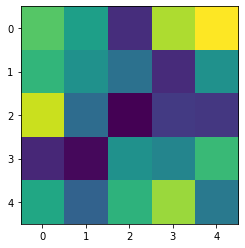

In [2]:
#1)
import numpy as np
from matplotlib.pyplot import imshow

#1. Create a numpy array of any dimension from scratch and print it. What is your numpy array's shape? What is your numpy array's data-type?
np_array = np.array([0,1,2,3,4,5,6,7,8,9])
type(np_array)


#2. After that, create another bigger random numpy array, and plot it as image.
bb=np.random.randint(low=0, high=100, size=(5,5))
bb

#plt.imshow(bb)
#plt.imshow(bb,cmap="hot")
#plt.imshow(bb).set_cmap('nipy_spectral')



#3. Then, change the values of the center of your second numpy array to zero (only the center!).

print(bb)

#center of a 5*5 array
bb[2,2]=0

plt.imshow(bb)
bb


(5745175.207376074, 5759973.416052084, 3840265.09437271, 3857249.4020576775)

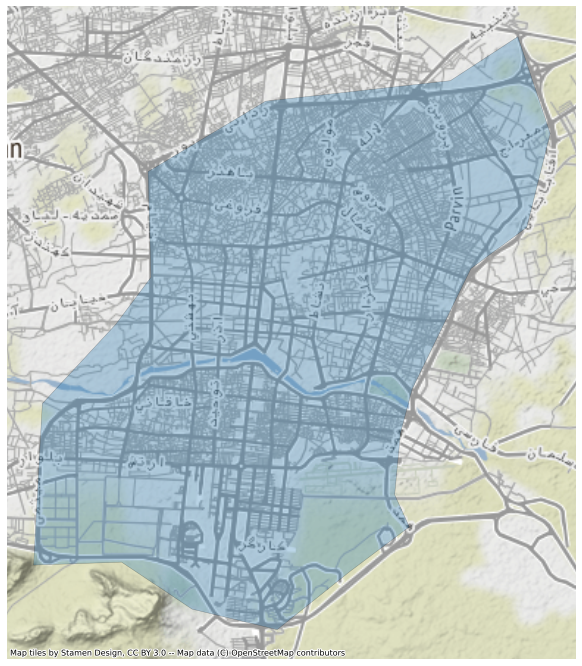

In [3]:

# Display the crop extent(Esfahan) with base map 
import matplotlib.pyplot as plt
import contextily as ctx

# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file('/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/isfahan.geojson')
#type(crop_extent)

# Modify projection to match what contextily uses
crop_extent = crop_extent.to_crs(epsg=3857)
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))

# create map
ax=crop_extent.plot(color=None, 
                    linewidth=0.5, 
                    ax=ax, 
                    edgecolor='k',
                    alpha=0.3)
ctx.add_basemap(ax,zoom=12)#, url=ctx.providers.Stamen.TonerLite
ax.set_axis_off()

# remove the axis
ax.axis('off')

/home/suny/anaconda3/envs/eagles-python/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


crop extent crs:  +init=epsg:32639 +type=crs
band4 crs:  EPSG:32639


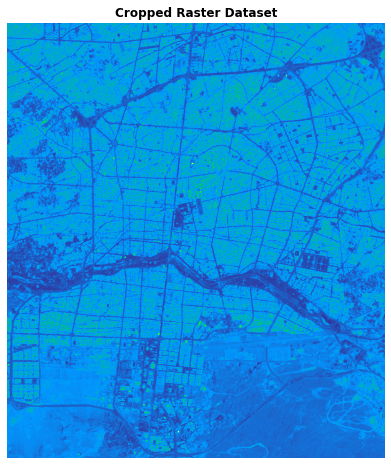

In [5]:
#2)
#1. Download a Sentinel 2 which contains a region of your interest.

# connect to the API
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from collections import OrderedDict
from sentinelsat import SentinelAPI
from datetime import date



api = SentinelAPI('sunymo', 'Sanazisamazing69@','https://scihub.copernicus.eu/dhus')


# search by polygon, time, and SciHub query keywords
#footprint = geojson_to_wkt(read_geojson('/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/isfahan.geojson'))

#products = api.query(footprint,
#                     date=('20200623', date(2020,0o06, 25)),
#                     platformname='Sentinel-2')

# convert to Pandas DataFrame
#products_df = api.to_dataframe(products)
#products_df

# sort and limit to first 5 sorted products
#products_df_sorted = products_df.sort_values(['cloudcoverpercentage', 'ingestiondate'], ascending=[True, True])
#products_df_sorted = products_df_sorted.head(5)
#products_df_sorted

# download sorted and reduced products
#api.download_all(products_df_sorted.index)

#2. Upload this scene here and print its dtype, as well as its content and plot it.
from rasterio import plot
#import bands as separate 1 band raster
imagePath = '/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/Sentinel_Data/S2A_MSIL1C_20200623T070631_N0209_R106_T39SWS_20200623T102418.SAFE/GRANULE/L1C_T39SWS_A026129_20200623T071832/IMG_DATA/'
band2 = rasterio.open(imagePath+'T39SWS_20200623T070631_B02.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open(imagePath+'T39SWS_20200623T070631_B03.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open(imagePath+'T39SWS_20200623T070631_B04.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(imagePath+'T39SWS_20200623T070631_B08.jp2', driver='JP2OpenJPEG') #nir

#type of raster byte
#band4.dtypes[0]

#raster values as matrix array
#band4.read(1)

#raster sytem of reference
#band4.crs

#multiple band representation
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
#plot.show(band2, ax=ax1, cmap='Blues')
#plot.show(band3, ax=ax2, cmap='Greens')
#plot.show(band4, ax=ax3, cmap='Reds')
#fig.tight_layout()

#3. Crop this scene to your region of interest.

# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file('/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/isfahan.geojson')
#type(crop_extent)

crop_extent = crop_extent.to_crs({'init':'epsg:32639'})
print('crop extent crs: ', crop_extent.crs)
print('band4 crs: ', band4.crs)


import earthpy.plot as ep
from rasterio.plot import plotting_extent

fig, ax = plt.subplots(figsize=(10, 8))
plot.show(band4,
          cmap='terrain',
          ax=ax,
          title="Raster Layer with Shapefile Overlayed")


crop_extent.plot(ax=ax, alpha=.8)
ax.set_axis_off()


import earthpy.spatial as es

with rasterio.open(imagePath+'T39SWS_20200623T070631_B04.jp2', driver='JP2OpenJPEG') as band4:
    band4_crop, band4_crop_meta = es.crop_image(band4,crop_extent)

# Plot your data
plot.show(band4_crop,
              cmap='terrain',
              title="Cropped Raster Dataset")


#4. Reproject your ROI to any coordinate system you find useful and describe why you have chosen this coordinate system.


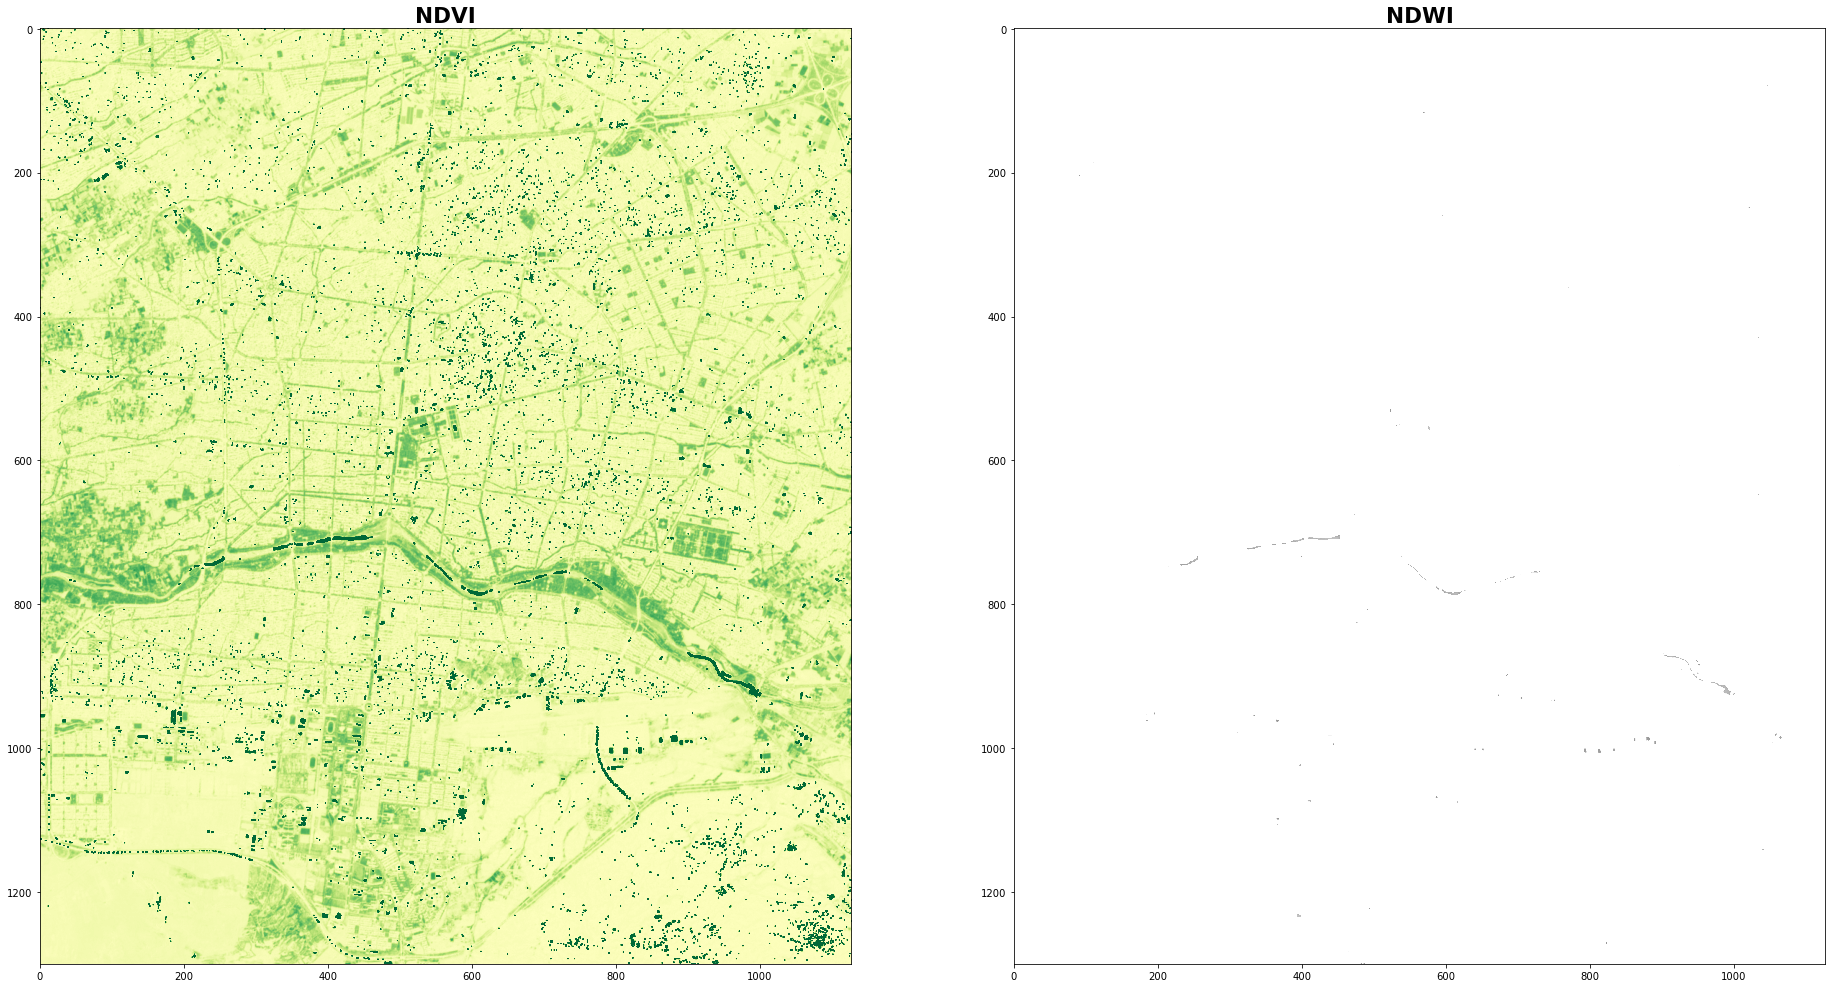

In [6]:
#5. Calculate the NDVI as well as the NDWI. Plot both Indice results as a map, with title, legend, etc..
#???legend 
fig, (axndvi, axndwi) = plt.subplots(1,2, figsize=(32,20))

#change the font size for all elements (ticks, labels, title) on a matplotlib plot
#import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

#ndvi
type(crop_extent)
type(band4_crop)
with rasterio.open(imagePath+'T39SWS_20200623T070631_B04.jp2', driver='JP2OpenJPEG') as red:
        red_crop, red_crop_meta = es.crop_image(red,crop_extent)
        
with rasterio.open(imagePath+'T39SWS_20200623T070631_B08.jp2', driver='JP2OpenJPEG') as nir:
        nir_crop, nir_crop_meta = es.crop_image(nir,crop_extent)


np.seterr(divide='ignore', invalid='ignore')  # Allow division by zero
ndvi = np.empty(nir_crop.shape, dtype=rasterio.float32)  # Create empty matrix
check = np.logical_or(nir_crop > 0.0, red_crop > 0.0)  # Create check raster with True/False values
ndvi = np.where(check, (nir_crop - red_crop) / (nir_crop + red_crop), -999)  # Calculate ndvi

plot.show(ndvi,
        cmap='RdYlGn',#PiYG
        title="NDVI",
        ax=axndvi,
        vmin=-1,
        vmax=1)


#ndwi

#NDWI = (Green - NIR) / (Green + NIR)
with rasterio.open(imagePath+'T39SWS_20200623T070631_B03.jp2', driver='JP2OpenJPEG')  as green:
        green_crop, green_crop_meta = es.crop_image(green,crop_extent)
        
with rasterio.open(imagePath+'T39SWS_20200623T070631_B08.jp2', driver='JP2OpenJPEG') as nir:
        nir_crop, nir_crop_meta = es.crop_image(nir,crop_extent)
        
np.seterr(divide='ignore', invalid='ignore')  # Allow division by zero
ndwi = np.empty(nir_crop.shape, dtype=rasterio.float32)  # Create empty matrix
check = np.logical_or(nir_crop > 0.0, green_crop > 0.0)  # Create check raster with True/False values
ndwi = np.where(check, (green_crop - nir_crop) / (green_crop + nir_crop), -999)  # Calculate ndvi

plot.show(ndwi,
        cmap='Greys_r',#RdYlGn
        title="NDWI",
        vmin=-1,
        vmax=1)


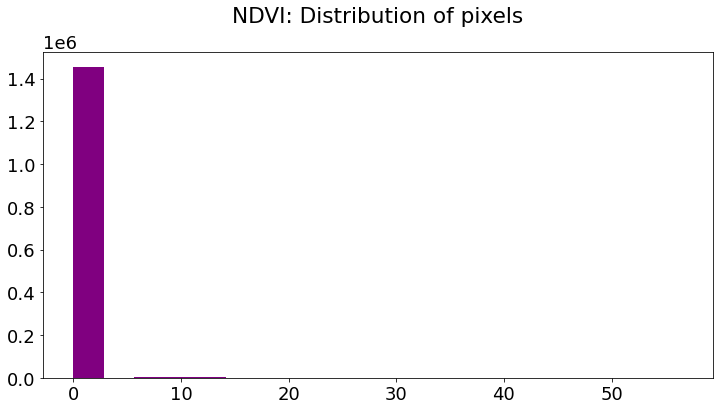

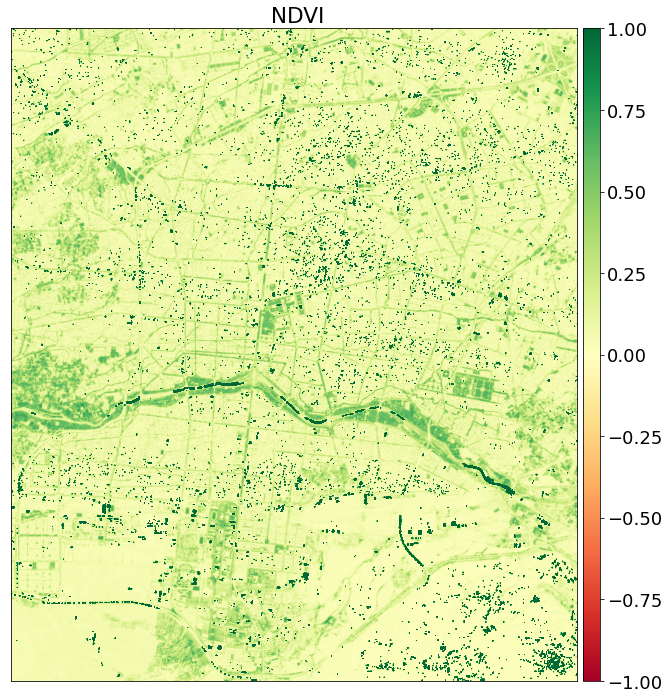

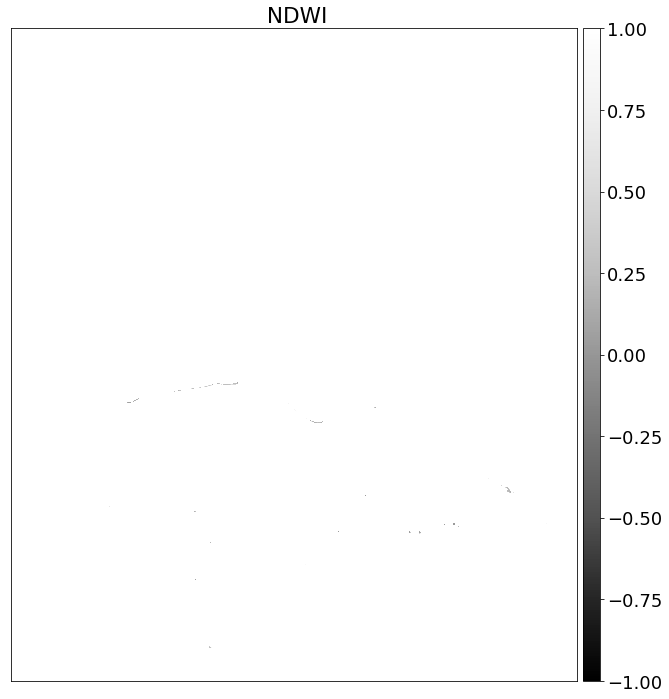

In [7]:
#????????6. Calculate the total area covered by water and by vital vegetation. 
#Describe your workflow briefly.
import earthpy.plot as ep
ep.hist(ndvi,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n "])

plt.show()

ep.plot_bands(ndvi, 
              cmap='RdYlGn',#PiYG
              scale=False,
              vmin=-1, vmax=1,
              title=" NDVI")
plt.show()

ep.plot_bands(ndwi, 
              cmap='Greys_r',
              scale=False,
              vmin=-1, vmax=1,
              title=" NDWI")
plt.show()

./Sentinel_Data/S2A_MSIL1C_20200623T070631_N0209_R106_T39SWS_20200623T102418.SAFE/GRANULE/L1C_T39SWS_A026129_20200623T071832/IMG_DATA/T39SWS_20200623T070631_TCI.jp2
vector data projection is: epsg:4326
raster data projection is: EPSG:32639
crop extent crs:  +init=epsg:32639 +type=crs
band4 crs:  EPSG:32639


/home/suny/anaconda3/envs/eagles-python/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/suny/anaconda3/envs/eagles-python/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


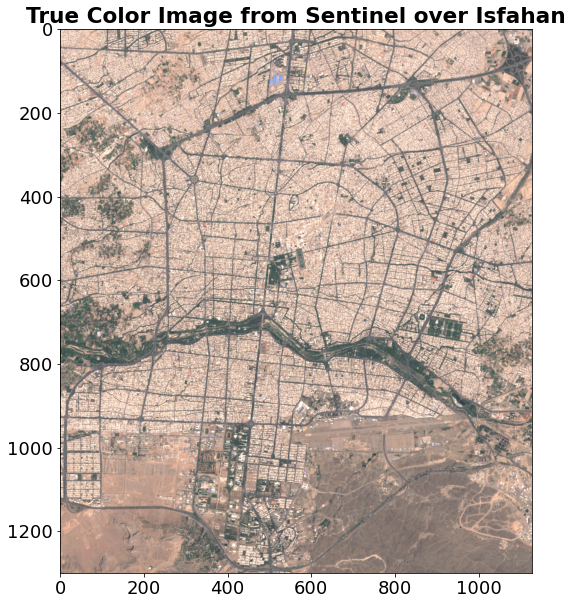

./Sentinel_Data/S2A_MSIL2A_20200623T070631_N0214_R106_T39SWS_20200623T113337.SAFE/GRANULE/L2A_T39SWS_A026129_20200623T071832/IMG_DATA/R20m/T39SWS_20200623T070631_SCL_20m.jp2


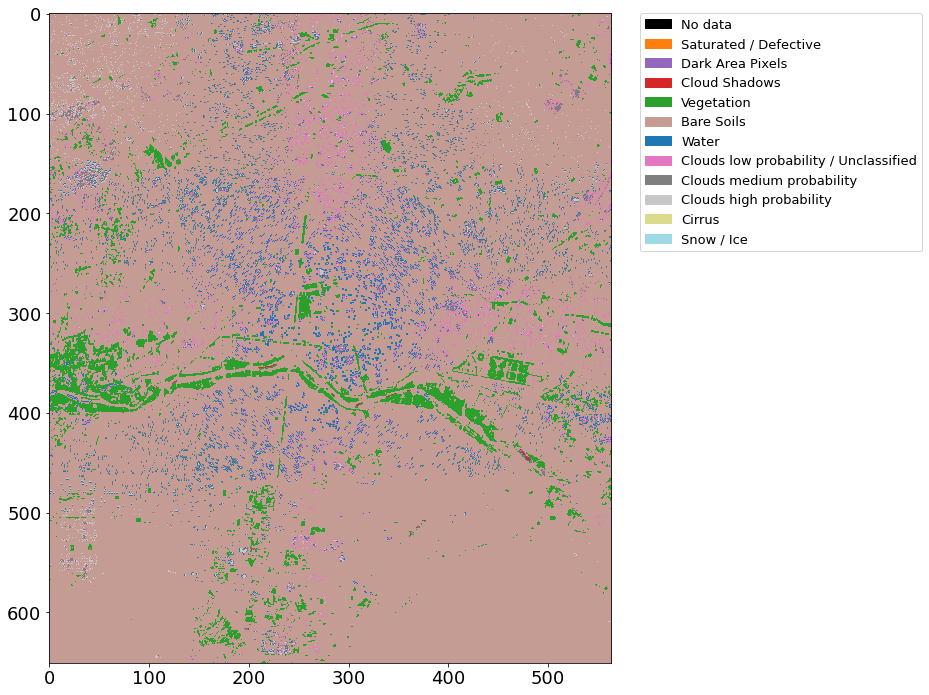

In [10]:

#Visulaize the RGB of the area of interest

import os
from rasterio.plot import show
from rasterio import mask


#mpimg.imread(os.getcwd() + "/Sentinel_Data/S2A_MSIL2A_20200623T070631_N0214_R106_T39SWS_20200623T113337.SAFE/GRANULE/L2A_T39SWS_A026129_20200623T071832/IMG_DATA/R10m/T39SWS_20200623T070631_B04_10m.jp2'")
for root, dir, files in os.walk(r'./Sentinel_Data/S2A_MSIL1C_20200623T070631_N0209_R106_T39SWS_20200623T102418.SAFE'):
    for file in files:
        if file.endswith("TCI.jp2"):
            TCI = (os.path.join(root, file))
print(TCI)
rgb = rasterio.open(TCI, driver='JP2OpenJPEG') #RGB
# show(rgb.read(), transform=rgb.transform)

#Make the image display a little bigger
# plt.figure(figsize=(12, 10))
# show(rgb.read(), transform=rgb.transform)
# plt.show()

#Now open a geojson file (or indeed any vector file) and plot
gdf = gpd.read_file('/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/isfahan.geojson')
#gdf.plot()

#Check the projection
print('vector data projection is:', gdf.crs)
print('raster data projection is:', rgb.crs)

#reproject the vecotr data 
gdf=gdf.to_crs({'init':'epsg:32639'})


#Let's plot them together
fig, ax = plt.subplots(figsize=(12, 10))
#show(rgb.read(), transform=rgb.transform, ax=ax)
# gdf.plot(ax=ax, color='white', alpha=.75) ## alpha is the transparency setting
# plt.show()

#What if we just want to plot the area contained by the isfahan.geojson file?
# masked, mask_transform = rasterio.mask.mask(dataset=rgb, shapes=gdf.geometry, crop=True)#
# show(masked, transform = mask_transform)


# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file('/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/isfahan.geojson')


crop_extent = crop_extent.to_crs({'init':'epsg:32639'})
print('crop extent crs: ', crop_extent.crs)
print('band4 crs: ', rgb.crs)


import earthpy.spatial as es

with rasterio.open(TCI, driver='JP2OpenJPEG') as rgb_2:
    rgb_2_crop, rgb_2_crop_meta = es.crop_image(rgb_2,crop_extent)

# Plot your data
plot.show(rgb_2_crop,
              title="True Color Image from Sentinel over Isfahan")


# SCL(Scene classification layer) in L2A sentinel 2
from matplotlib.colors import ListedColormap
#mpimg.imread(os.getcwd() + "/Sentinel_Data/S2A_MSIL2A_20200623T070631_N0214_R106_T39SWS_20200623T113337.SAFE/GRANULE/L2A_T39SWS_A026129_20200623T071832/IMG_DATA/R10m/T39SWS_20200623T070631_B04_10m.jp2'")
for root, dir, files in os.walk(r'./Sentinel_Data/S2A_MSIL2A_20200623T070631_N0214_R106_T39SWS_20200623T113337.SAFE'):
    for file in files:
        if file.endswith("SCL_20m.jp2"):
            SCL = (os.path.join(root, file))

print(SCL)
Scene_Classification = rasterio.open(SCL, driver='JP2OpenJPEG') #RGB

with rasterio.open(SCL, driver='JP2OpenJPEG') as scl:
    scl_crop, scl_crop_meta = es.crop_image(scl,crop_extent)

# Plot your data
f, ax = plt.subplots(figsize=(12, 10))
# Create a list of labels to use for your legend
scene_classification_labels = ["No data",
                       "Saturated / Defective",
                       "Dark Area Pixels",
                       "Cloud Shadows",
                       "Vegetation",
                       "Bare Soils",
                       "Water",
                       "Clouds low probability / Unclassified",
                       "Clouds medium probability",
                       "Clouds high probability",
                       "Cirrus",
                       "Snow / Ice"]

# Create a colormap from a list of colors
colors=((0.0, 0.0, 0.0),

 (1.0, 0.4980392156862745, 0.054901960784313725),

 (0.5803921568627451, 0.403921568627451, 0.7411764705882353), 

 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),

 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),

 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745))

cmap = ListedColormap(colors)

im = ax.imshow(scl_crop[0], cmap=cmap, vmin=0, vmax=11)#, title='Scene Classification Isfahan'
ep.draw_legend(
    im,
    titles=scene_classification_labels,
    classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
)
plt.tight_layout()

Landsat on AWS:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7601, 'height': 7731, 'count': 1, 'crs': CRS.from_epsg(32639), 'transform': Affine(30.0, 0.0, 554085.0,
       0.0, -30.0, 3787815.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}
Decimation factor= 9


<ipython-input-5-26010716242f>:109: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir - red) / (nir + red)


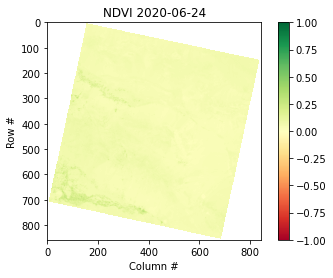

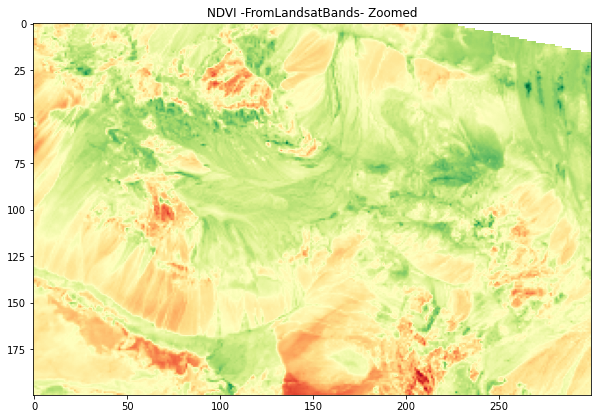

Decimation factor= 9


<ipython-input-5-26010716242f>:166: RuntimeWarning: invalid value encountered in true_divide
  ndwi = (green - nir) / (green + nir)


Text(0, 0.5, 'Row #')

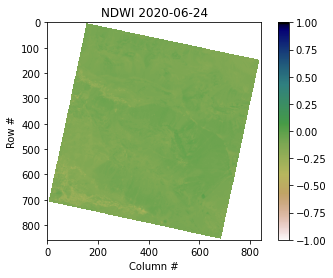

In [5]:
#Landsat 8 Scence
#Calculate the NDVI as well as the NDWI. Plot both Indice results as a map, with title, legend, etc..

#source:https://geohackweek.github.io/raster/04-workingwithrasters/
#Isfahan: Row:163 , Path:037 

import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


print('Landsat on AWS:')
filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/163/037/LC08_L1TP_163037_20200624_20200707_01_T1/LC08_L1TP_163037_20200624_20200707_01_T1_B4.TIF'
with rasterio.open(filepath) as src:
    print(src.profile)

#Plot a low-resolution overview

# The grid of raster values can be accessed as a numpy array and plotted:
# with rasterio.open(filepath) as src:
#    oviews = src.overviews(1) # list of overviews from biggest to smallest
#    oview = oviews[-1] # let's look at the smallest thumbnail
  # print('Decimation factor= {}'.format(oview))
    # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
  # thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

# print('array type: ',type(thumbnail))
# print(thumbnail)

# plt.imshow(thumbnail)
# plt.colorbar()
# plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
# plt.xlabel('Column #')
# plt.ylabel('Row #')


# with rasterio.open(filepath) as src:
#     oviews = src.overviews(1)
#     oview = oviews[-1]
#     print('Decimation factor= {}'.format(oview))
#     thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

#     thumbnail = thumbnail.astype('f4')
#     thumbnail[thumbnail==0] = np.nan

# plt.imshow(thumbnail)
# plt.colorbar()
# plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
# plt.xlabel('Column #')
# plt.ylabel('Row #')


#https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html
#rasterio.windows.Window(col_off, row_off, width, height)
# window = rasterio.windows.Window(1024, 1024, 1280, 2560)

# with rasterio.open(filepath) as src:
#     subset = src.read(1, window=window)

# plt.figure(figsize=(6,8.5))
# plt.imshow(subset)
# plt.colorbar(shrink=0.5)
# plt.title(f'Band 4 Subset\n{window}')
# plt.xlabel('Column #')
# plt.ylabel('Row #')

# NDVI

date='2020-06-24'

#I gave the exact address of the bands to prevent problems with reasterio 
redband = 'http://landsat-pds.s3.amazonaws.com/c1/L8/163/037/LC08_L1TP_163037_20200624_20200707_01_T1/LC08_L1TP_163037_20200624_20200707_01_T1_B4.TIF'
nirband = 'http://landsat-pds.s3.amazonaws.com/c1/L8/163/037/LC08_L1TP_163037_20200624_20200707_01_T1/LC08_L1TP_163037_20200624_20200707_01_T1_B5.TIF'


with rasterio.open(redband) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    red = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

# plt.imshow(red)
# plt.colorbar()
# plt.title('{}\nRed {}'.format(redband, red.shape))
# plt.xlabel('Column #')
# plt.ylabel('Row #')

with rasterio.open(nirband) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    nir = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
    

# plt.imshow(nir)
# plt.colorbar()
# plt.title('{}\nNIR {}'.format(nirband, nir.shape))
# plt.xlabel('Column #')
# plt.ylabel('Row #')


#Calculate NDVI and plot it 
def calc_ndvi(nir,red):
    '''Calculate NDVI from integer arrays'''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi

ndvi_landsat = calc_ndvi(nir,red)
plt.imshow(ndvi_landsat, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')



#This is the zoomed in image
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
plt.imshow(ndvi_landsat[100:300,400:700], cmap='RdYlGn')
plt.title('NDVI -FromLandsatBands- Zoomed')
plt.show()


# NDWI

#I gave the exact address of the bands to prevent problems with reasterio 
greenband = 'http://landsat-pds.s3.amazonaws.com/c1/L8/163/037/LC08_L1TP_163037_20200624_20200707_01_T1/LC08_L1TP_163037_20200624_20200707_01_T1_B3.TIF'
nirband   =   'http://landsat-pds.s3.amazonaws.com/c1/L8/163/037/LC08_L1TP_163037_20200624_20200707_01_T1/LC08_L1TP_163037_20200624_20200707_01_T1_B5.TIF'

with rasterio.open(greenband) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    green = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

# plt.imshow(green)
# plt.colorbar()
# plt.title('{}\nGreen {}'.format(greenband, green.shape))
# plt.xlabel('Column #')
# plt.ylabel('Row #')

with rasterio.open(nirband) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    nir = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
    

# plt.imshow(nir)
# plt.colorbar()
# plt.title('{}\nNIR {}'.format(nirband, nir.shape))
# plt.xlabel('Column #')
# plt.ylabel('Row #')


#Calculate NDWI and plot it 
def calc_ndwi(nir,green):
    '''Calculate NDWI from integer arrays'''
    nir = nir.astype('f4')
    green = green.astype('f4')
    ndwi = (green - nir) / (green + nir)
    return ndwi

ndwi_landsat = calc_ndwi(nir,green)
plt.imshow(ndwi_landsat, cmap='gist_earth_r')#PuBu_r,RdBu_r
plt.colorbar()
plt.title('NDWI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')


{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7601, 'height': 7731, 'count': 1, 'crs': CRS.from_epsg(32639), 'transform': Affine(30.0, 0.0, 554085.0,
       0.0, -30.0, 3787815.0)}
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 377, 'height': 434, 'count': 1, 'crs': CRS.from_epsg(32639), 'transform': Affine(30.0, 0.0, 557775.0,
       0.0, -30.0, 3619065.0)}
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7601, 'height': 7731, 'count': 1, 'crs': CRS.from_epsg(32639), 'transform': Affine(30.0, 0.0, 554085.0,
       0.0, -30.0, 3787815.0)}
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 377, 'height': 434, 'count': 1, 'crs': CRS.from_epsg(32639), 'transform': Affine(30.0, 0.0, 557775.0,
       0.0, -30.0, 3619065.0)}
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7601, 'height': 7731, 'count': 1, 'crs': CRS.from_epsg(32639), 'transform': Affine(30.0, 0.0, 554085.0,
       0.0, -30.0, 3787815.0)}
{'driver'

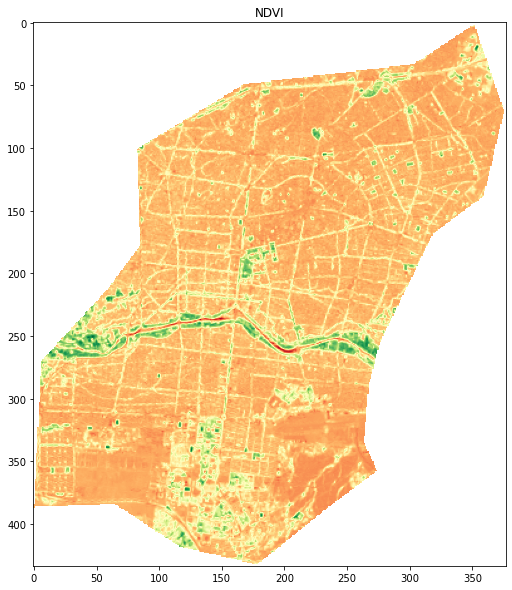

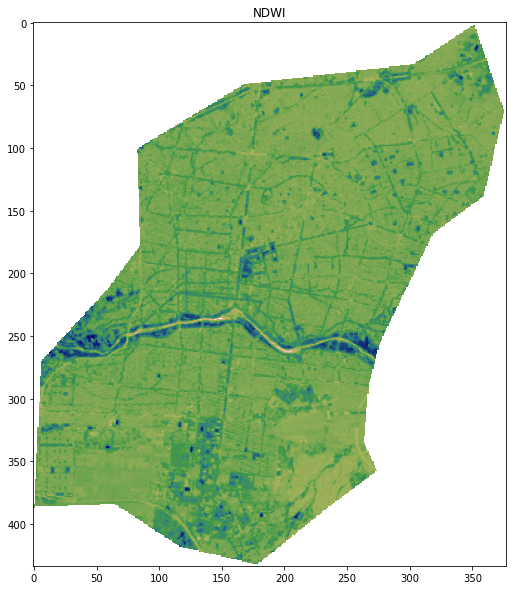

In [28]:
# Landsat 8,  Calculate the total area covered by water and by vital vegetation.

# source_1: https://github.com/geohackweek/raster-2019/blob/master/notebooks/4-landsat8.ipynb
# source_2: http://laviegeo.blogspot.com/2017/11/calculating-ndvi-with-sentinel-2-data.html

# Import libraries
import geopandas as gpd
import pandas as pd

import json
from cartopy import crs as ccrs

import rasterio
import rasterio.mask
from rasterio.session import AWSSession
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from osgeo import gdal


# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file('/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/isfahan.geojson')
#bbox = crop_extent.bounds

greenband = 'http://landsat-pds.s3.amazonaws.com/c1/L8/163/037/LC08_L1TP_163037_20200624_20200707_01_T1/LC08_L1TP_163037_20200624_20200707_01_T1_B3.TIF'
redband   = 'http://landsat-pds.s3.amazonaws.com/c1/L8/163/037/LC08_L1TP_163037_20200624_20200707_01_T1/LC08_L1TP_163037_20200624_20200707_01_T1_B4.TIF'
nirband   = 'http://landsat-pds.s3.amazonaws.com/c1/L8/163/037/LC08_L1TP_163037_20200624_20200707_01_T1/LC08_L1TP_163037_20200624_20200707_01_T1_B5.TIF'

#red
with rasterio.open(redband) as src:
    # re-project vector to match raster CRS
    print(src.meta)
    shape = crop_extent.to_crs(epsg=src.crs.to_epsg())
    out_image_1, out_transform = rasterio.mask.mask(src, shape.geometry.values, crop=True)
    out_meta = src.meta
    out_meta.update({
                 "height": out_image_1.shape[1],
                 "width": out_image_1.shape[2],
                 "transform": out_transform})
    print(out_meta)
    
# write small image to local Geotiff file
with rasterio.open('subset_red.tif', 'w', **out_meta) as dst:
        dst.write(out_image_1)

        
#nir        
with rasterio.open(nirband) as src:
    # re-project vector to match raster CRS
    print(src.meta)
    shape = crop_extent.to_crs(epsg=src.crs.to_epsg())
    out_image_2, out_transform = rasterio.mask.mask(src, shape.geometry.values, crop=True)
    out_meta = src.meta
    out_meta.update({
                 "height": out_image_2.shape[1],
                 "width": out_image_2.shape[2],
                 "transform": out_transform})
    print(out_meta)
    
# write small image to local Geotiff file    
with rasterio.open('subset_nir.tif', 'w', **out_meta) as dst:
        dst.write(out_image_2)

        
        
#green        
with rasterio.open(greenband) as src:
    # re-project vector to match raster CRS
    print(src.meta)
    shape = crop_extent.to_crs(epsg=src.crs.to_epsg())
    out_image_3, out_transform = rasterio.mask.mask(src, shape.geometry.values, crop=True)
    out_meta = src.meta
    out_meta.update({
                 "height": out_image_3.shape[1],
                 "width": out_image_3.shape[2],
                 "transform": out_transform})
    print(out_meta)
    
# write small image to local Geotiff file    
with rasterio.open('subset_green.tif', 'w', **out_meta) as dst:
        dst.write(out_image_3)
        
# Open up your two .tif files you'll need to do the calculation
b5 = gdal.Open('subset_nir.tif')
b4 = gdal.Open('subset_red.tif')
b3 = gdal.Open('subset_green.tif')

# Just in case you somehow have a bad file you should always check to make sure the file
# was opened properly. Then it's time to grab the band from each .tif file.
d5 = b5.GetRasterBand(1)
d4 = b4.GetRasterBand(1)
d3 = b3.GetRasterBand(1)

# Then we need to make it readable so we'll input the data as an array.
img_5 = d5.ReadAsArray()
img_4 = d4.ReadAsArray()
img_3 = d3.ReadAsArray()

# Next is the calculation remember [(NIR-RED)/(NIR+RED)]
img_5 = img_5.astype('f4')#nir
img_4 = img_4.astype('f4')#red
img_3 = img_3.astype('f4')#green


ndvi = (img_5 - img_4) / (img_5 + img_4)
ndwi = (img_3 - img_5) / (img_3 + img_5)

# Finally we'll set up the plot and graph the data to the screen.
# This is the full image of NDVI
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.imshow(ndvi, cmap='RdYlGn') # Typically the color map for NDVI maps are the Red to Yellow to Green
plt.title('NDVI')
plt.show()

# This is the full image of NDWI
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.imshow(ndwi, cmap='gist_earth') 
plt.title('NDWI')
plt.show()


# But what if I want to zoom in on a specific area?
# I can do so by adjusting what part of the array 
# is plotted as you'll see below in the plt.imshow line. 
# Compare it to the one from the previous image. You can
# adjust the range to specify the amount that it is 
# zoomed in. Remember that the ndvi array is [y,x]
# and not [x,y] like we might normally think.

#This is the zoomed in image
# fig = plt.figure(figsize=(10,10))
# fig.set_facecolor('white')
# plt.imshow(ndvi[200:300,100:200], cmap='RdYlGn')
# plt.title('NDVI - Zoomed')
# plt.show()
        

In [22]:
# type(ndwi)
# ndwi.data.shape
# ndwi.view()
#type(img_3)

numpy.ndarray

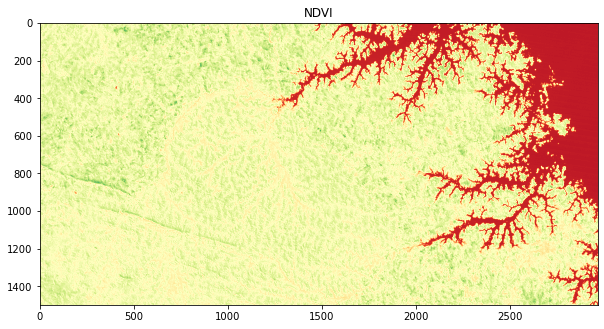

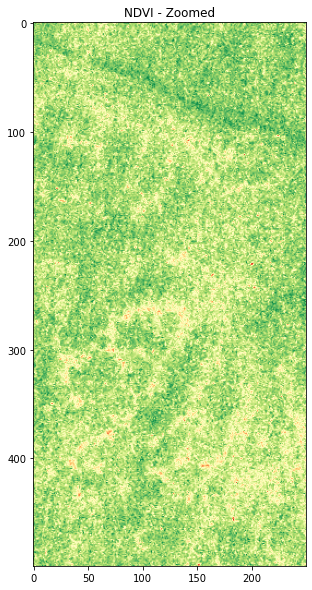

numpy.ndarray

In [43]:
#Landsat 8 Scence,
# source: http://laviegeo.blogspot.com/2017/11/calculating-ndvi-with-sentinel-2-data.html

# Import all the stuff that you'll need for this. It's really only two things the gdal
# and the matplotlib but I have a habit of always importing sys and/or os and numpy
# even if I don't need to do so.

from osgeo import gdal
from matplotlib import pyplot as plt
import sys
import numpy as np

# Open up your two .tif files you'll need to do the calculation
b8a = gdal.Open('/home/suny/EAGLE-Master/second-semester/spatial-python/SpatialPython2020/Data/raster/classification/LT52240632011210CUB01_sr_band4.tif')
b4 = gdal.Open('/home/suny/EAGLE-Master/second-semester/spatial-python/SpatialPython2020/Data/raster/classification/LT52240632011210CUB01_sr_band3.tif')
type(b8a)
# Just in case you somehow have a bad file you should always check to make sure the file
# was opened properly. Then it's time to grab the band from each .tif file.
d8a = b8a.GetRasterBand(1)
d4 = b4.GetRasterBand(1)

# type(d8a)
# d8a.GetStatistics
# d8a.Checksum
# d8a.DataType
# d8a.GetOverview
# d8a.ComputeBandStats

# Then we need to make it readable so we'll input the data as an array.
img_8a = d8a.ReadAsArray()
img_4 = d4.ReadAsArray()

# Next is the calculation remember [(NIR-RED)/(NIR+RED)]
ndvi = (img_8a - img_4) / (img_8a + img_4)

# Finally we'll set up the plot and graph the data to the screen.
# This is the full image
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.imshow(img_8a, cmap='RdYlGn') # Typically the color map for NDVI maps are the Red to Yellow to Green
plt.title('NDVI')
plt.show()


# But what if I want to zoom in on a specific area?
# I can do so by adjusting what part of the array 
# is plotted as you'll see below in the plt.imshow line. 
# Compare it to the one from the previous image. You can
# adjust the range to specify the amount that it is 
# zoomed in. Remember that the ndvi array is [y,x]
# and not [x,y] like we might normally think.

# This is the zoomed in image
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
plt.imshow(ndvi[1000:2000,500:750 ], cmap='RdYlGn')
plt.title('NDVI - Zoomed')
plt.show()


type(ndvi)




In [ ]:
import glob
import numpy as np
from osgeo import gdal

imagePath = '/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/Sentinel_Data/S2A_MSIL2A_20200623T070631_N0214_R106_T39SWS_20200623T113337.SAFE/GRANULE/L2A_T39SWS_A026129_20200623T071832/IMG_DATA/R10m/'
red_file = glob.glob(imagePath + '**B04**.jp2') # red band
#print(red_file)
nir_file = glob.glob(imagePath + '**B08**.jp2') # nir band
#print(nir_file)


# Define a function to calculate NDVI using band arrays for red, NIR bands
def ndvi(red, nir):
 return ((nir - red)/(nir + red))


# Open each band using gdal
red_link = gdal.Open(red_file[0])
#print(red_link)
nir_link = gdal.Open(nir_file[0])
#print(nir_link)

# read in each band as array and convert to float for calculations
red = red_link.ReadAsArray().astype(np.float)
#print(type(red))
nir = nir_link.ReadAsArray().astype(np.float)


# Call the ndvi() function on red, NIR bands
ndvi2 = ndvi(red, nir)


# Create output filename based on input name 
outfile_name = red_file[0].split('_B')[0] + '_NDVI.tif'
#print(outfile_name)

x_pixels = ndvi2.shape[0] # number of pixels in x
#print(x_pixels)
y_pixels = ndvi2.shape[1] # number of pixels in y
#print(y_pixels)

# Set up output GeoTIFF
driver = gdal.GetDriverByName('GTiff')
#print(driver)

# Create driver using output filename, x and y pixels, # of bands, and datatype
ndvi_data = driver.Create(outfile_name,x_pixels, y_pixels, 1,gdal.GDT_Float32)
#print(ndvi_data)

# Set NDVI array as the 1 output raster band
ndvi_data.GetRasterBand(1).WriteArray(ndvi2)
 
# Setting up the coordinate reference system of the output GeoTIFF
geotrans=red_link.GetGeoTransform() # Grab input GeoTranform information
#print(geotrans)
proj=red_link.GetProjection() # Grab projection information from input file
#print(proj)

# now set GeoTransform parameters and projection on the output file
ndvi_data.SetGeoTransform(geotrans) 
ndvi_data.SetProjection(proj)
ndvi_data.FlushCache()
ndvi_data=None

#print(type(ndvi_data))
#ndvi_data

#plot ndvi 
#imgplot2 = plt.imshow(ndvi2)
#plt.show()


In [90]:
import os
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

type(gdf.boundary)
type(gdf.geometry)
#gdf.geometry
# print(gdf.boundary)
gdf = gpd.read_file('/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/isfahan.geojson')
print(gdf.bounds)

#type(gdf.bounds)
# df = pd.DataFrame(
#     {'Point_Pos': ['LL', 'UL', 'LR', 'UR'],
#      'Latitude': [3.606059e+06, 3.619041e+06, 3.606059e+06, 3.619041e+06],
#      'Longitude': [557784.986587, 557784.986587, 569059.530489, 569059.530489]})
# g_df = geopandas.GeoDataFrame(
#     df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
# type(g_df.geometry)
# g_df.geometry
#!pip install sentinelsat
#!pip install datetime

        minx       miny       maxx    maxy
0  51.615829  32.590213  51.736679  32.707


In [45]:
#conda search sentinelhub

In [45]:
#! conda list